In [38]:
import numpy as np
import pandas as pd
# import ydata_profiling
# import autogluon

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')

In [63]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [67]:
# Split train data into input and output variables
X = train_data.drop('Next_Tmax', axis=1)
y = train_data['Next_Tmax']

In [68]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)



In [69]:
polynomial_converter.fit(X)


PolynomialFeatures(include_bias=False)

In [70]:
poly_features = polynomial_converter.transform(X)

In [71]:
poly_features

array([[2.76000000e+01, 2.31000000e+01, 3.95481911e+01, ...,
        2.68137552e+01, 2.39004448e+04, 2.13036651e+07],
       [2.72000000e+01, 2.16000000e+01, 8.27724609e+01, ...,
        5.09811241e+00, 1.28644073e+04, 3.24616175e+07],
       [2.74000000e+01, 2.13000000e+01, 3.83575363e+01, ...,
        4.94172900e-02, 1.22647534e+03, 3.04395842e+07],
       ...,
       [3.18000000e+01, 2.49000000e+01, 6.04232597e+01, ...,
        9.70225000e-03, 5.00357924e+02, 2.58041230e+07],
       [3.16000000e+01, 2.44000000e+01, 3.41808014e+01, ...,
        2.23691162e+01, 2.77389169e+04, 3.43977611e+07],
       [3.22000000e+01, 1.86000000e+01, 3.52760429e+01, ...,
        2.68137552e+01, 2.52668044e+04, 2.38091009e+07]])

In [72]:
poly_features.shape


(6451, 252)

In [73]:
X.shape


(6451, 21)

In [74]:
from sklearn.model_selection import train_test_split


In [75]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 42)


In [76]:
from sklearn.linear_model import LinearRegression


In [77]:
model_poly = LinearRegression()


In [78]:
model_poly.fit(X_train, y_train)


LinearRegression()

In [79]:
y_pred = model_poly.predict(X_test)


In [80]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
1726,29.9,32.229356,-2.329356
4975,33.2,31.146012,2.053988
4763,33.7,33.351476,0.348524
4266,30.9,30.389141,0.510859
5683,32.9,32.194861,0.705139
4695,27.2,27.401457,-0.201457
401,25.7,26.304871,-0.604871
3372,31.2,27.731339,3.468661
1328,30.8,29.058390,1.741610
3975,29.4,28.403942,0.996058


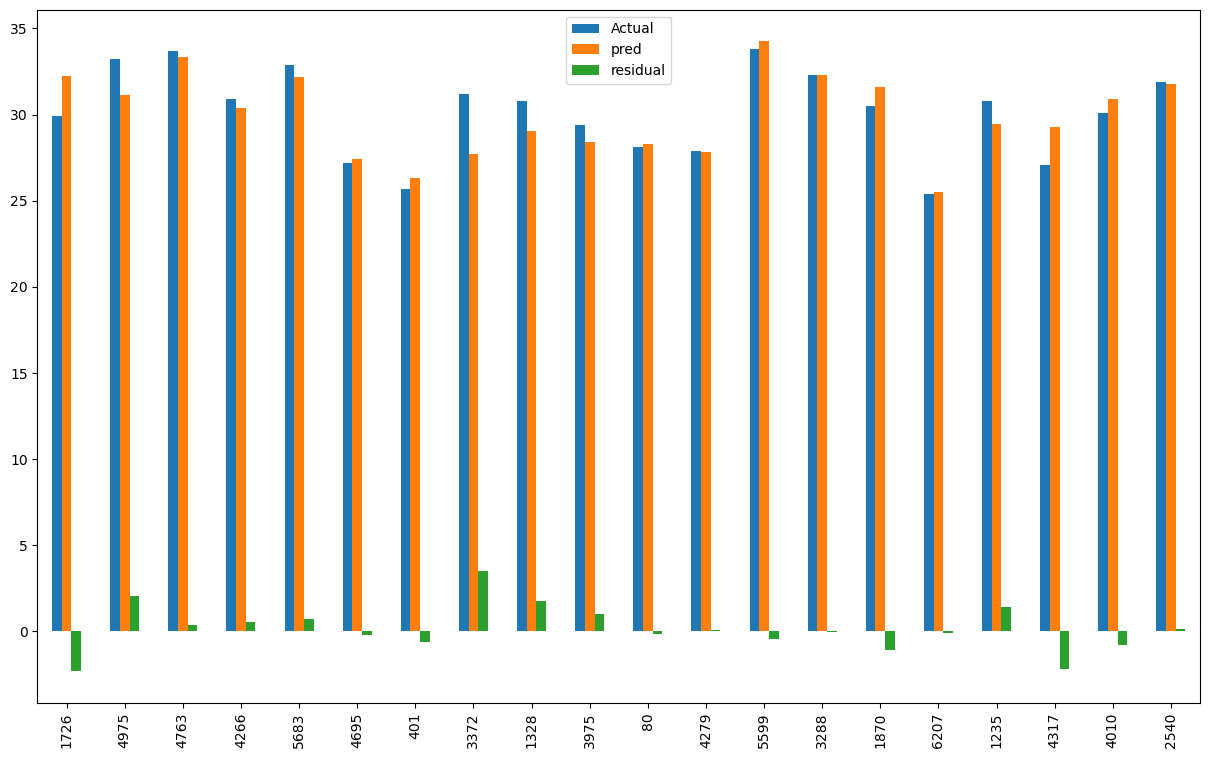

In [81]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [83]:
y_pred = model_poly.predict(X_test)


In [84]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [85]:
eval_metric(y_test, y_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8473772433659359
MAE 		: 0.9101515024693343
MSE 		: 1.4627030739358218
RMSE 		: 1.2094226200695197


In [86]:
y_train_pred = model_poly.predict(X_train)


In [87]:
eval_metric(y_train, y_train_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8700135215026538
MAE 		: 0.8612634000245716
MSE 		: 1.2680518765407864
RMSE 		: 1.1260780952228786


In [88]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [93]:
poly(5)


,train_rmse_errors,test_rmse_errors,number of features
1,1.444134,1.512605,21
2,1.126078,1.209423,252
3,0.801259,4.114603,2023
4,0.073496,88.737346,12649


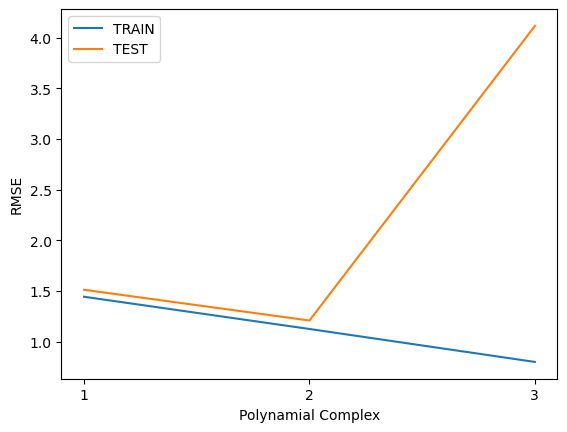

In [94]:
plt.plot(range(1,4), poly(4)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,4), poly(4)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.xticks(np.arange(1,4,1))
plt.legend();

In [98]:
# Import necessary libraries
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Split train data into input and output variables
X = train_data.drop('Next_Tmax', axis=1)
y = train_data['Next_Tmax']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1], 'gamma': [0.1, 1], 'kernel': ['linear', 'rbf']}

# Create SVM model
svm_model = SVR()

# Perform grid search using RMSE as the evaluation metric
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best hyperparameters from the grid search
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_kernel = grid_search.best_params_['kernel']

# Fit SVM model with best hyperparameters
svm_model = SVR(C=best_C, gamma=best_gamma, kernel=best_kernel)
svm_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_svm = svm_model.predict(X_train)

# Evaluate model performance using RMSE
svm_rmse = np.sqrt(mean_squared_error(y_train, y_pred_svm))

print("SVM RMSE: {:.2f}".format(svm_rmse))

SVM RMSE: 1.21


In [97]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Create SVM model with chosen hyperparameters
svm_model = SVR(C=1, gamma=0.1, kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_svm = svm_model.predict(X_train)

# Evaluate model performance using RMSE
svm_rmse = np.sqrt(mean_squared_error(y_train, y_pred_svm))

print("SVM RMSE: {:.2f}".format(svm_rmse))

SVM RMSE: 1.97


In [100]:
from sklearn.tree import DecisionTreeRegressor

# Define parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10]}

# Create Decision Tree model
dt_model = DecisionTreeRegressor()

# Perform grid search using RMSE as the evaluation metric
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best hyperparameters from the grid search
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Fit Decision Tree model with best hyperparameters
dt_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
dt_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_dt = dt_model.predict(X_train)

# Evaluate model performance using RMSE
dt_rmse = np.sqrt(mean_squared_error(y_train, y_pred_dt))

print("Decision Tree RMSE: {:.2f}".format(dt_rmse))

Decision Tree RMSE: 0.99


In [104]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [50, 100], 'max_depth': [3], 'min_samples_leaf': [ 2], 'min_samples_split': [2, 3]}

# Create Random Forest model
rf_model = RandomForestRegressor()

# Perform grid search using RMSE as the evaluation metric
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best hyperparameters from the grid search
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Fit Random Forest model with best hyperparameters
rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_rf = rf_model.predict(X_train)

# Evaluate model performance using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_train, y_pred_rf))

print("Random Forest RMSE: {:.2f}".format(rf_rmse))
print("Best hyperparameters: ", grid_search.best_params_)


Random Forest RMSE: 1.61
Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}


In [106]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = train_data.drop(columns=['Next_Tmax'])
y = train_data['Next_Tmax']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost regressor object
ada_reg = AdaBoostRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [ 0.1,0.3, 0.5],
    'loss': ['linear', 'square', 'exponential']
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(ada_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print various error metrics
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))


Best hyperparameters: {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}
Mean squared error: 2.3708609929883524
Mean absolute error: 1.2430739662249275
R-squared score: 0.7506713237165078


In [114]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = train_data.drop(columns=['Next_Tmax'])
y = train_data['Next_Tmax']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor object
xgb_reg = XGBRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [200, 400],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 9],
    'subsample': [0.4, 0.6],
    'colsample_bytree': [0.6, 0.8, 1]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print various error metrics
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))


Best hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.4}
Root Mean squared error: 0.8254170160118565
Mean absolute error: 0.6187337277011296
R-squared score: 0.9283505311616548
